In [1]:
%load_ext autoreload
%autoreload 2
import os; import sys;sys.path.append("..")
import socceraction.classification.features as fs
import pandas as pd

In [36]:
games = pd.read_hdf("../data/spadl.h5","games")
games[:4]

,attendance,away_team_id,competition_id,duration,game_date,game_id,home_team_id,matchday,referee_id,season_id,venue_id
37,45517,175,23,96,2017-12-10 15:15:00,942948,185,15,42055,2017,2476
43,11767,140,24,94,2017-08-06 15:00:00,920528,2128,1,42021,2017,3400
21,12000,413,112,95,2017-08-11 18:30:00,917587,2052,3,43824,2017,3312
0,19279,135,21,95,2016-12-04 14:00:00,879320,603,15,40448,2016,2698


In [37]:
actions = pd.read_hdf("../data/spadl.h5","actions/game_917587")
actions = actions.merge(pd.read_hdf("../data/spadl.h5","actiontypes"))
actions = actions.merge(pd.read_hdf("../data/spadl.h5","results"))
actions = actions.merge(pd.read_hdf("../data/spadl.h5","bodyparts"))
actions = actions.sort_values(["period_id","time_seconds","timestamp"]).reset_index(drop=True)
actions[:5]

,game_id,period_id,time_seconds,timestamp,team_id,player_id,start_x,start_y,end_x,end_y,result_id,bodypart_id,type_id,type_name,result_name,bodypart_name
0,917587.0,1.0,1.0,2017-08-11 18:30:18,2052.0,185727.0,52.710,34.680,39.165,37.060,1,0,0,pass,success,foot
1,917587.0,1.0,4.0,2017-08-11 18:30:21,2052.0,169535.0,39.165,37.060,37.800,6.188,1,0,0,pass,success,foot
2,917587.0,1.0,7.0,2017-08-11 18:30:24,2052.0,12579.0,37.800,6.188,63.105,8.296,1,0,0,pass,success,foot
3,917587.0,1.0,9.0,2017-08-11 18:30:26,413.0,230251.0,66.780,7.888,66.780,7.888,1,0,9,tackle,success,foot
4,917587.0,1.0,11.0,2017-08-11 18:30:28,413.0,39188.0,67.515,9.180,52.920,3.536,1,0,0,pass,success,foot


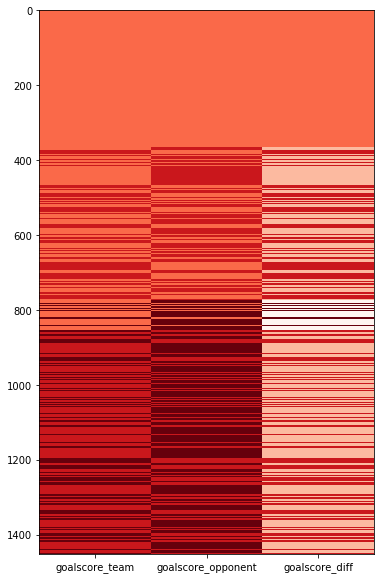

Index(['goalscore_team', 'goalscore_opponent', 'goalscore_diff'], dtype='object')

In [38]:
import matplotlib.pyplot as plt

a = actions
f = fs.actiontype(a)
fo = fs.actiontype_onehot(a)

#f = fs.result([a])
#fo = fs.result_onehot([a])

#f = fs.bodypart([a])
#fo = fs.bodypart_onehot([a])
fo = fs.goalscore([a])
plt.imshow(fo.values,aspect='auto',cmap="Reds")
plt.xticks(range(len(fo.columns)),fo.columns)
plt.gcf().set_size_inches(len(fo.columns)*2,10)
plt.show()
fo.columns

In [39]:
gs = fs.gamestates(a,4)
fs.play_left_to_right(gs,185)
pd.concat([fs.team(gs),fs.location(gs)],axis=1)
t = fs.time(gs)
#t[:2]
#t.loc[:1,:]
fs.time_delta(gs)
fs.space_delta(gs)
fs.goalscore(gs)

,goalscore_team,goalscore_opponent,goalscore_diff
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0
